# semua fitur + minmax

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_obesitas = pd.read_csv('/content/drive/MyDrive/DatasetAIUTS/ObesityDataSet_raw_and_data_sinthetic.csv')
data_obesitas.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data_obesitas.loc[data_obesitas.duplicated(keep=False), :]


In [ ]:
data_obesitas.drop_duplicates(inplace=True)


In [ ]:
data_copy = data_obesitas.copy()

In [ ]:
label_encoder = LabelEncoder()
label = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']
for i in label:
  data_obesitas[i] = label_encoder.fit_transform(data_obesitas[i])

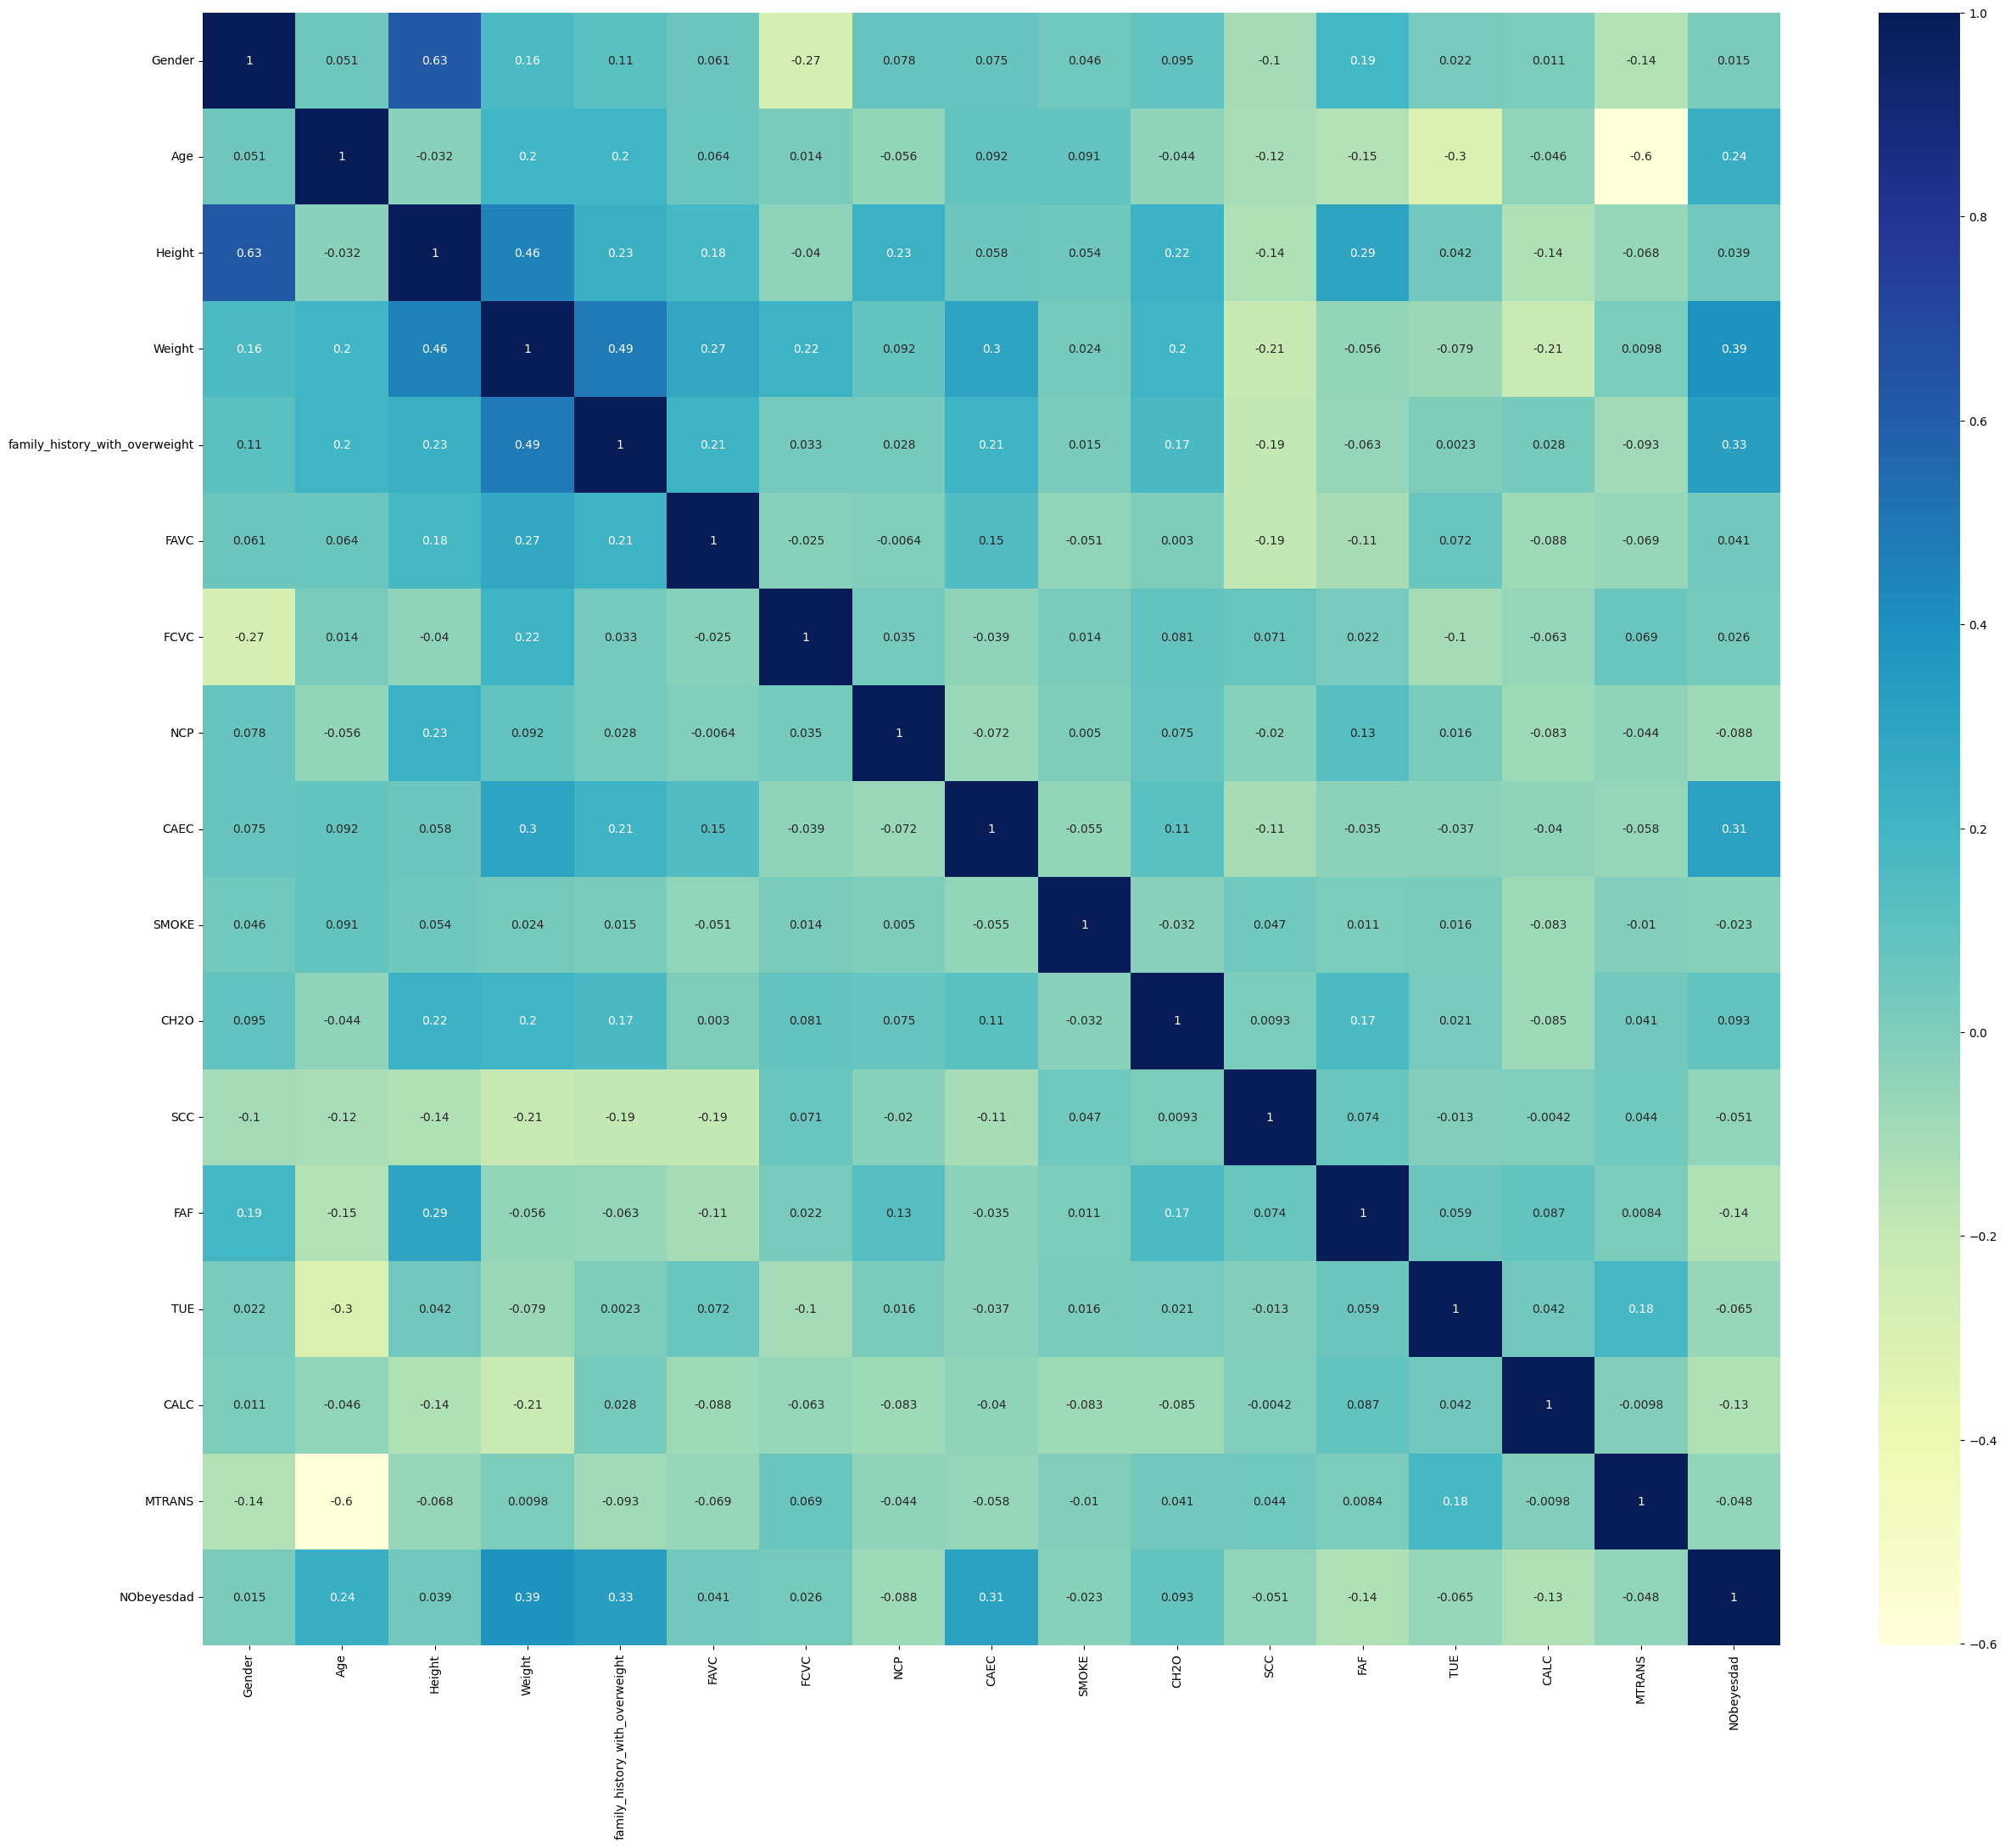

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(data_obesitas.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
X = data_obesitas.drop(columns=['NObeyesdad'])
y = data_obesitas.pop('NObeyesdad')

In [ ]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int64  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   FAVC                            2087 non-null   int64  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int64  
 9   SMOKE                           2087 non-null   int64  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int64  
 12  FAF                             2087 no

## kami menggunkan minmax scake pada fitur age heigt dan weigt, sempat mecoba semua X di min max namun hasilnya lebih baik jikna hanya 3 varibel itu yang di scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[['Age','Height','Weight']])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc )

Accuracy: 0.9114832535885168


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    'n_neighbors': range(1, 21),  # Jumlah tetangga dari 1 hingga 20
    'weights': ['uniform', 'distance'],  # Skema pemberian bobot
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Jenis metrik jarak
}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # Cross-validation dengan 5 lipatan
    scoring='accuracy',  # Metrik evaluasi
    verbose=1,  # Menampilkan proses
    n_jobs=-1  # Menggunakan semua prosesor
)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", acc)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Accuracy: 0.9574616532700364
Accuracy on Test Data: 0.9449760765550239


## manual ecludian

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

class KNN_euclidean:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    @staticmethod
    def _euclidean_distance(p, q):
        return np.sqrt(np.sum((p - q) ** 2))

    def fit(self, X, y):
        self.X_train = X.values if isinstance(X, pd.DataFrame) else np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
      X = X.values if isinstance(X, pd.DataFrame) else np.array(X)
      predictions = []
      for p in X:
          euc_distances = [self._euclidean_distance(p, q) for q in self.X_train]
          sorted_k = np.argsort(euc_distances)[:self.k]
          k_nearest = [self.y_train[idx] for idx in sorted_k]
          mode_result = stats.mode(k_nearest)
          predictions.append(mode_result.mode if np.isscalar(mode_result.mode) else mode_result.mode[0])
      return np.array(predictions)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
for i in range(2,22):
  model = KNN_euclidean(k=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"k = {i} --- Akurasi: {accuracy}")

k = 2 --- Akurasi: 0.9354066985645934
k = 3 --- Akurasi: 0.9186602870813397
k = 4 --- Akurasi: 0.9114832535885168
k = 5 --- Akurasi: 0.9114832535885168
k = 6 --- Akurasi: 0.9066985645933014
k = 7 --- Akurasi: 0.9043062200956937
k = 8 --- Akurasi: 0.8875598086124402
k = 9 --- Akurasi: 0.8971291866028708
k = 10 --- Akurasi: 0.8923444976076556
k = 11 --- Akurasi: 0.8899521531100478
k = 12 --- Akurasi: 0.8851674641148325
k = 13 --- Akurasi: 0.8875598086124402
k = 14 --- Akurasi: 0.8827751196172249
k = 15 --- Akurasi: 0.8827751196172249
k = 16 --- Akurasi: 0.8708133971291866
k = 17 --- Akurasi: 0.8732057416267942
k = 18 --- Akurasi: 0.8708133971291866
k = 19 --- Akurasi: 0.8755980861244019
k = 20 --- Akurasi: 0.8755980861244019
k = 21 --- Akurasi: 0.8779904306220095


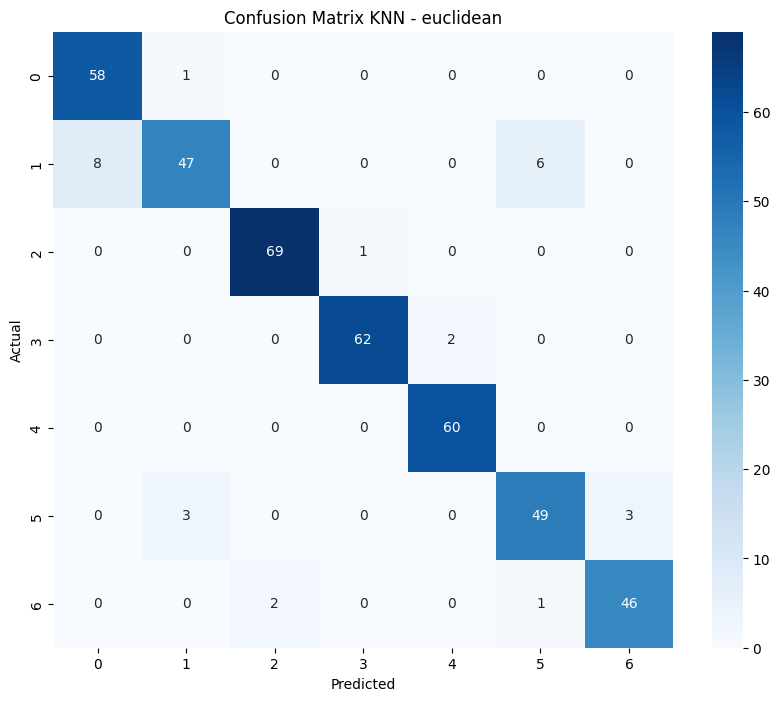



Akurasi: 0.9354066985645934
Laporan Klasifikasi KNN - euclidean:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93        59
           1       0.92      0.77      0.84        61
           2       0.97      0.99      0.98        70
           3       0.98      0.97      0.98        64
           4       0.97      1.00      0.98        60
           5       0.88      0.89      0.88        55
           6       0.94      0.94      0.94        49

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.93       418



In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

model = KNN_euclidean(k=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN - euclidean')
plt.show()
print(f"\n\nAkurasi: {accuracy}")
print("Laporan Klasifikasi KNN - euclidean:\n", classification_report(y_test, y_pred))

## knn manhantan

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

class KNN_manhattan:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    @staticmethod
    def _manhattan_distance(p, q):
        return np.sum(np.abs(p - q))

    def fit(self, X, y):
        self.X_train = X.values if isinstance(X, pd.DataFrame) else np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else np.array(X)
        predictions = []
        for p in X:
            manhattan_distances = [self._manhattan_distance(p, q) for q in self.X_train]
            sorted_k = np.argsort(manhattan_distances)[:self.k]
            k_nearest = [self.y_train[idx] for idx in sorted_k]
            mode_result = stats.mode(k_nearest)
            predictions.append(mode_result.mode if np.isscalar(mode_result.mode) else mode_result.mode[0])
        return np.array(predictions)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
for i in range(2,22):
  model = KNN_manhattan(k=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"k = {i} --- Akurasi: {accuracy}")

k = 2 --- Akurasi: 0.9449760765550239
k = 3 --- Akurasi: 0.9258373205741627
k = 4 --- Akurasi: 0.9258373205741627
k = 5 --- Akurasi: 0.9186602870813397
k = 6 --- Akurasi: 0.9138755980861244
k = 7 --- Akurasi: 0.9114832535885168
k = 8 --- Akurasi: 0.9210526315789473
k = 9 --- Akurasi: 0.9114832535885168
k = 10 --- Akurasi: 0.9090909090909091
k = 11 --- Akurasi: 0.9043062200956937
k = 12 --- Akurasi: 0.9043062200956937
k = 13 --- Akurasi: 0.9019138755980861
k = 14 --- Akurasi: 0.8971291866028708
k = 15 --- Akurasi: 0.8971291866028708
k = 16 --- Akurasi: 0.8899521531100478
k = 17 --- Akurasi: 0.8875598086124402
k = 18 --- Akurasi: 0.8755980861244019
k = 19 --- Akurasi: 0.8779904306220095
k = 20 --- Akurasi: 0.8803827751196173
k = 21 --- Akurasi: 0.8803827751196173


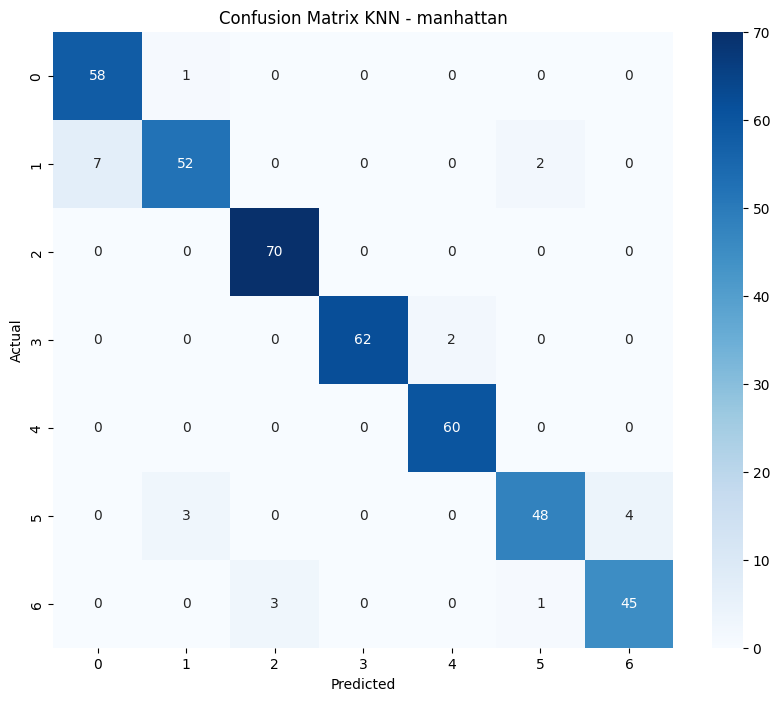



Akurasi: 0.9449760765550239
Laporan Klasifikasi KNN - manhattan:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94        59
           1       0.93      0.85      0.89        61
           2       0.96      1.00      0.98        70
           3       1.00      0.97      0.98        64
           4       0.97      1.00      0.98        60
           5       0.94      0.87      0.91        55
           6       0.92      0.92      0.92        49

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.94      0.94       418



In [ ]:
model = KNN_manhattan(k=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN - manhattan')
plt.show()
print(f"\n\nAkurasi: {accuracy}")
print("Laporan Klasifikasi KNN - manhattan:\n", classification_report(y_test, y_pred))